In [ ]:
# This is a implementation just one 1 dimensional input

In [1]:
from sklearn import model_selection
import numpy as np

In [3]:
data = np.loadtxt("data.csv",delimiter=",")

In [4]:
x = data[:,0]
y = data[:,1]

In [6]:
x1,x2,y1,y2 = model_selection.train_test_split(x,y,test_size=0.3)

In [7]:
def fit(_x,_y):
    m = ((_x*_y).mean() - _x.mean()*_y.mean())/((_x*_x).mean()-((_x.mean())**2))
    c = _y.mean() - m*_x.mean()
    return m,c
m,c = fit(x1,y1)

In [8]:
def predict(_x,_m,_c):
    _y = _m*_x+_c
    return _y
y_pred = predict(x2,m,c)

In [9]:
import matplotlib.pyplot as plt

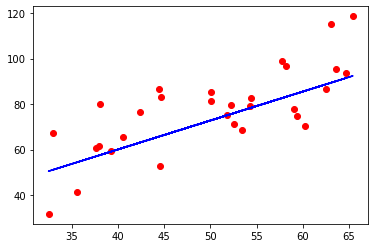

In [13]:
plt.scatter(x2,y2,color='red')
# plt.scatter(x1,y1,color='green')
plt.plot(x2,y_pred,color='blue')
plt.show()

In [18]:
def cd(_y_pred,_y):
    u = ((_y-_y_pred)**2).sum()
    v = ((_y-_y.mean())**2).sum()
    return 1-(u/v)
coeff_of_determination = cd(y_pred,y2)

In [23]:
def cost(_y,_y_pred):
    return ((_y-_y_pred)**2).mean()
mCost = cost(y2,y_pred)

In [24]:
print("coefficient of determination is: ",coeff_of_determination)
print("cost is: ",mCost)

coefficient of determination is:  0.5064273426562954
cost is:  166.95658460553705


In [25]:
# checking same for the train data
y_pred_train = predict(x1,m,c)
print(cd(y_pred_train,y1))
print(cost(y1,y_pred_train))

0.6225851780784166
88.70891493388179


In [30]:
# comparing with inuilt library for exact same data
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
x1_sk = x1.reshape(-1,1)
x2_sk = x2.reshape(-1,1)
alg.fit(x1_sk,y1)
y_pred_sk = alg.predict(x2_sk)

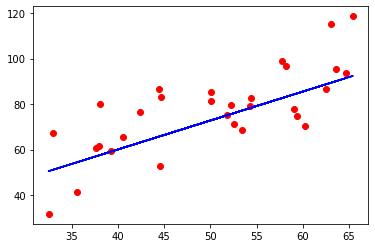

In [33]:
plt.scatter(x2,y2,color='red')
plt.plot(x2,y_pred_sk,color='green')
plt.plot(x2,y_pred,color='blue')
plt.show()
# plot of both lines are perfectly overlapping on each other,
# that means, internally sklearn is applying same logic as we did 🤩